In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
%matplotlib inline
import numpy as np

df = pd.concat(pd.read_excel("Dados/201907.xlsx", sheet_name=None), ignore_index=True)
df = df.dropna(axis="columns")
df = df.rename(columns={"Tipo   Lançamento  Nr. Ordem\nAbast." : "Tipo", "Unnamed: 10" : "Nr Litros", "Unnamed: 4" : "Lançamento", "Valor        Numero Abast." : "Valor Abast.", "Unnamed: 8" : "Lançamento"})
df = df.drop("Lançamento", axis = 1)
df["Produto"] = df["Produto"].replace("ÁLCOOL COMBUSTÍVEL (ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEO DIESEL S-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINA COMUM", "GASOLINA")
df["Produto"] = df["Produto"].replace("ÁLCOOLCOMBUSTÍVEL(ETANOL)", "ETANOL")
df["Produto"] = df["Produto"].replace("ÓLEODIESELS-10", "DIESEL")
df["Produto"] = df["Produto"].replace("GASOLINACOMUM", "GASOLINA")
df["Valor Abast."] = df["Valor Abast."].astype(str)
df["Valor Abast."] = df["Valor Abast."].str.replace(",", ".")
df['Valor Abast.'] = df['Valor Abast.'].str.replace(" ","")
df["Valor Abast."] = pd.to_numeric(df["Valor Abast."], errors="ignore")
df["Valor Abast."] = df["Valor Abast."].astype(float)
df["Valor Abast."] = df["Valor Abast."].round(2)
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df

C:\Users\Lucas Menossi\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
0,01/07/2019,79437,ASZ-7083,GASOLINA,Abast,8.629,37.03
1,01/07/2019,79472,BCG-4255,DIESEL,Abast,51.451,184.72
2,01/07/2019,79468,BCD-6529,GASOLINA,Abast,34.500,148.01
3,01/07/2019,79463,BCD-6524,GASOLINA,Abast,38.720,166.12
4,01/07/2019,93011,ATW-9412,GASOLINA,Abast,5.681,24.38
...,...,...,...,...,...,...,...
273,31/07/2019,79468,BCD-6529,ETANOL,Abast,41.219,115.00
274,31/07/2019,79416,AJM-9210,GASOLINA,Abast,30.780,128.97
275,31/07/2019,79413,AHQ-1425,GASOLINA,Abast,45.630,191.19
276,31/07/2019,79470,BCD-6851,GASOLINA,Abast,35.091,147.03


In [2]:
df["Nr Litros"].mean()
#df["Valor Abast."].std()
#df["Valor Ajustado"].std()

47.32239568345321

In [3]:
df.sort_values(by="Nr Litros")

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
162,18/07/2019,93011,ATW-9412,GASOLINA,Abast,2.800,11.74
70,08/07/2019,93011,ATW-9412,GASOLINA,Abast,5.220,22.40
4,01/07/2019,93011,ATW-9412,GASOLINA,Abast,5.681,24.38
147,17/07/2019,93011,ATW-9412,GASOLINA,Abast,6.451,27.04
191,22/07/2019,93014,ATW-9372,GASOLINA,Abast,6.451,27.03
...,...,...,...,...,...,...,...
263,30/07/2019,31093,AZL-3509,DIESEL,Abast,167.900,585.97
136,16/07/2019,31102,AZR-9543,DIESEL,Abast,174.000,607.27
163,19/07/2019,31102,AZR-9543,DIESEL,Abast,175.481,612.44
33,03/07/2019,31093,AZL-3509,DIESEL,Abast,187.841,674.36


In [4]:
df[df["Nr Litros"] > df["Nr Litros"].mean()].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
106,09/07/2019,31050,ABY-1062,DIESEL,Abast,223.000,800.58
33,03/07/2019,31093,AZL-3509,DIESEL,Abast,187.841,674.36
163,19/07/2019,31102,AZR-9543,DIESEL,Abast,175.481,612.44
136,16/07/2019,31102,AZR-9543,DIESEL,Abast,174.000,607.27
263,30/07/2019,31093,AZL-3509,DIESEL,Abast,167.900,585.97
...,...,...,...,...,...,...,...
15,02/07/2019,79471,BCD-6854,GASOLINA,Abast,48.249,207.00
209,23/07/2019,79454,BCC-4702,ETANOL,Abast,48.030,134.00
177,19/07/2019,79455,BCC-4703,ETANOL,Abast,48.000,133.93
125,15/07/2019,79472,BCG-4255,DIESEL,Abast,47.951,167.36


In [5]:
df[(df["Nr Litros"] > df["Nr Litros"].mean()) & (df["Produto"] == "GASOLINA")].sort_values(by="Nr Litros", ascending=False)

,Data,Nr Frota,Placa,Produto,Tipo,Nr Litros,Valor Abast.
57,08/07/2019,79444,ATL-9834,GASOLINA,Abast,51.170,219.53
35,04/07/2019,79470,BCD-6851,GASOLINA,Abast,50.100,214.94
173,19/07/2019,92046,ALE-6725,GASOLINA,Abast,49.439,207.16
15,02/07/2019,79471,BCD-6854,GASOLINA,Abast,48.249,207.00


In [6]:
df["Produto"].value_counts()

GASOLINA    148
ETANOL       69
DIESEL       61
Name: Produto, dtype: int64

In [7]:
df["Produto"].value_counts(normalize=True)

GASOLINA    0.532374
ETANOL      0.248201
DIESEL      0.219424
Name: Produto, dtype: float64

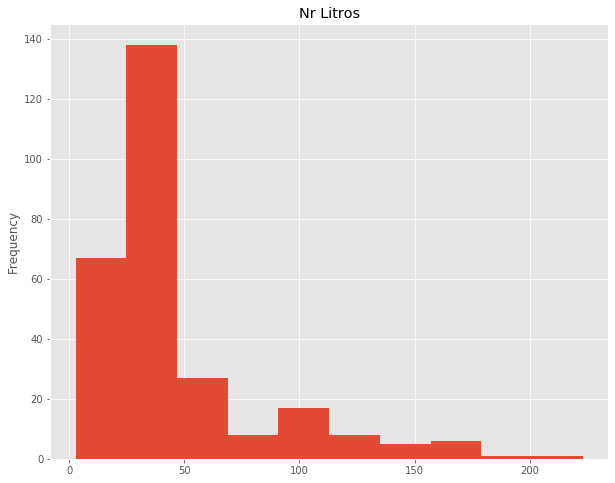

In [33]:
#Ploting
plt.rcParams.update({'font.size': 10, 'figure.figsize': (10, 8)})
#Gráfico de barras em relação ao número de litros
df["Nr Litros"].plot(kind='hist', title="Nr Litros")

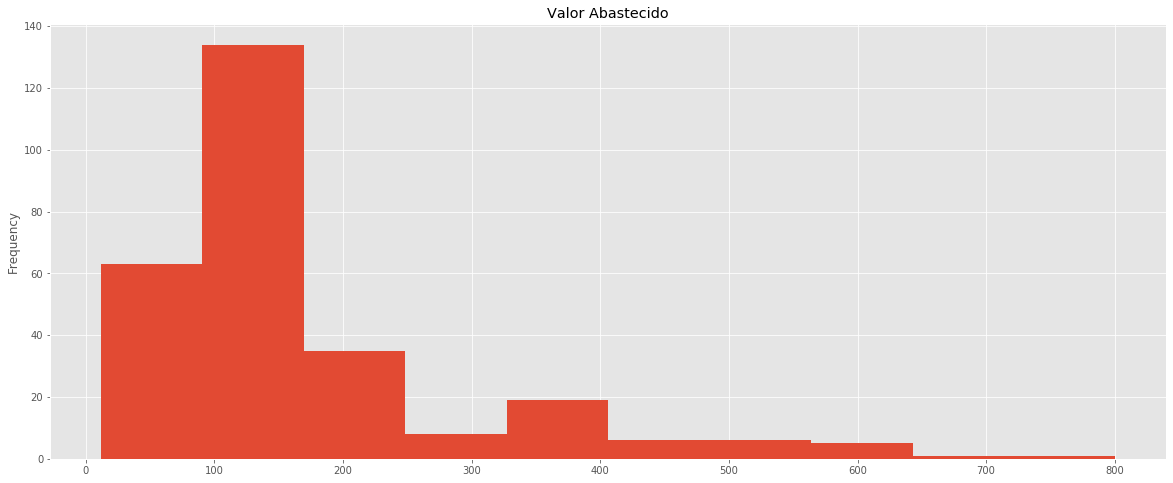

In [32]:
df["Valor Abast."].plot(kind='hist', title = "Valor Abastecido")

In [10]:
df["Nr Litros"].describe()

count    278.000000
mean      47.322396
std       37.964887
min        2.800000
25%       25.061750
50%       39.271000
75%       47.987750
max      223.000000
Name: Nr Litros, dtype: float64

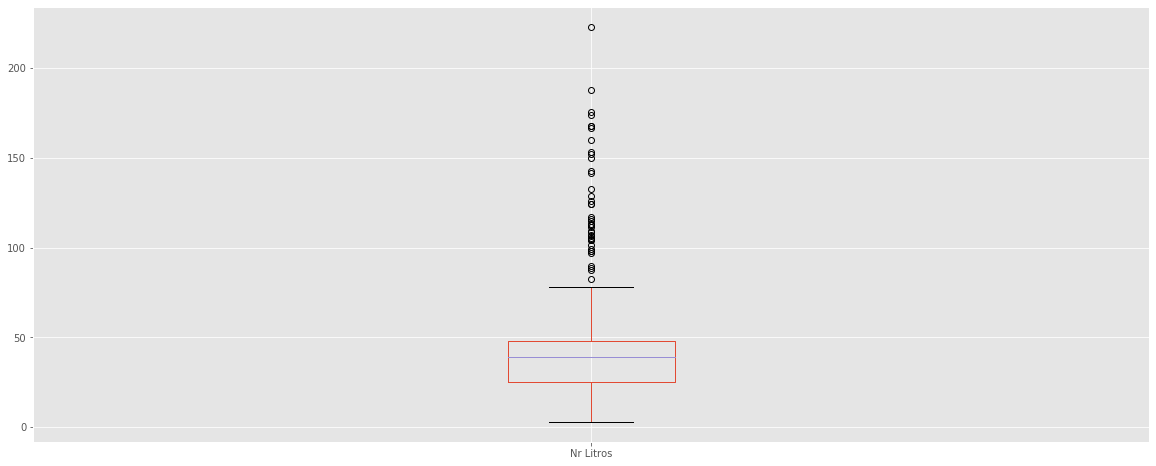

In [31]:
df["Nr Litros"].plot(kind="box")

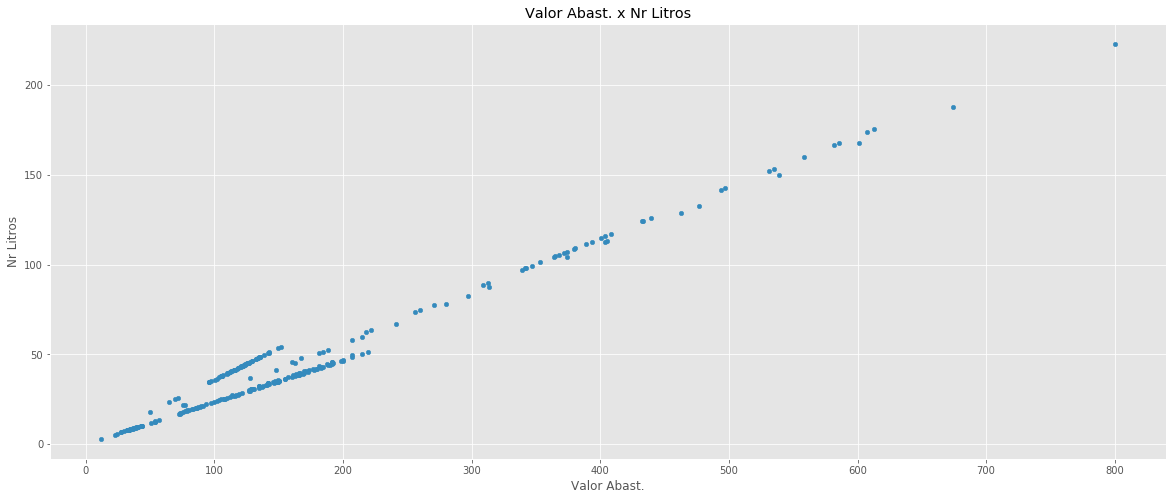

In [30]:
df.plot(kind='scatter', x = "Valor Abast.", y="Nr Litros", title="Valor Abast. x Nr Litros")

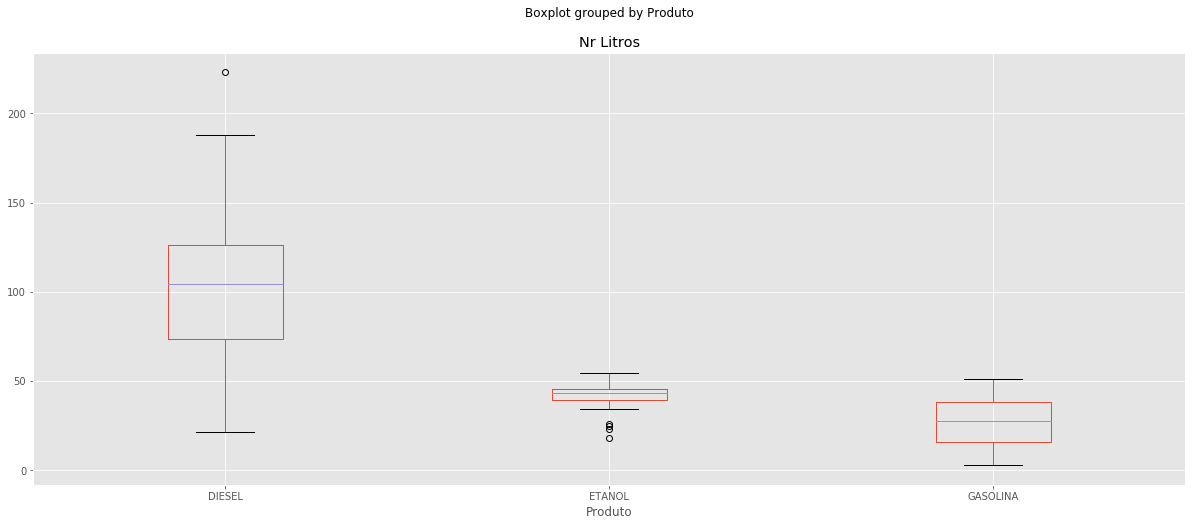

In [29]:
df.boxplot(column="Nr Litros", by="Produto")

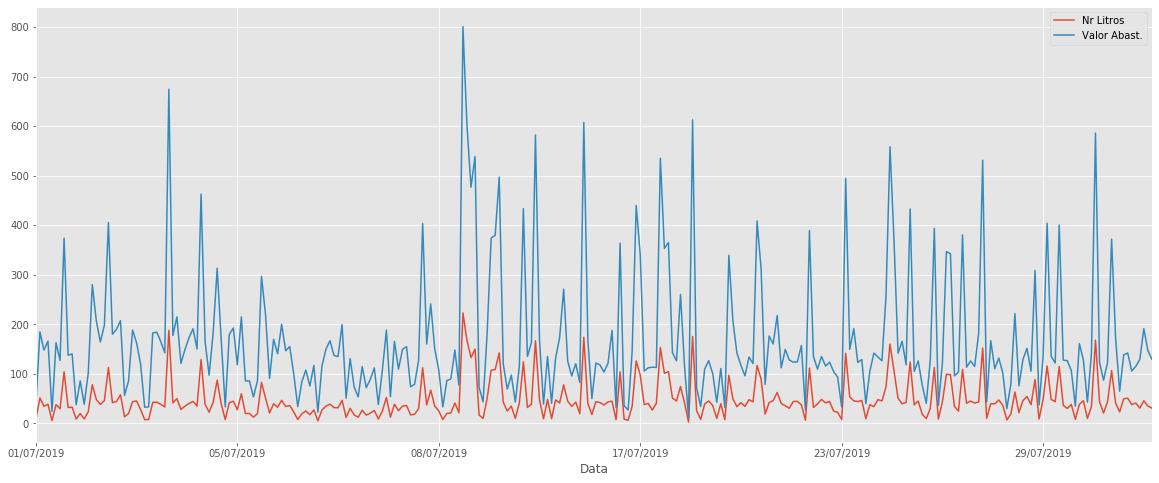

In [28]:
plt.rcParams.update({'font.size': 10, 'figure.figsize': (20, 8)})
ax = plt.gca()
df.plot(kind='line', x = "Data", y = "Nr Litros", ax=ax)
df.plot(kind='line', x = "Data", y = "Valor Abast.", ax=ax)

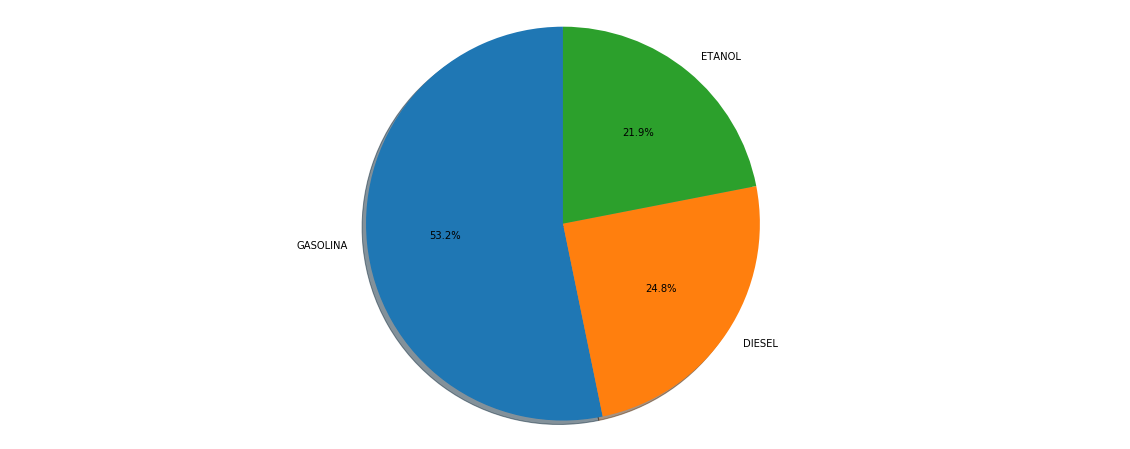

In [15]:
labels = df["Produto"].unique()
sizes = df["Produto"].value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

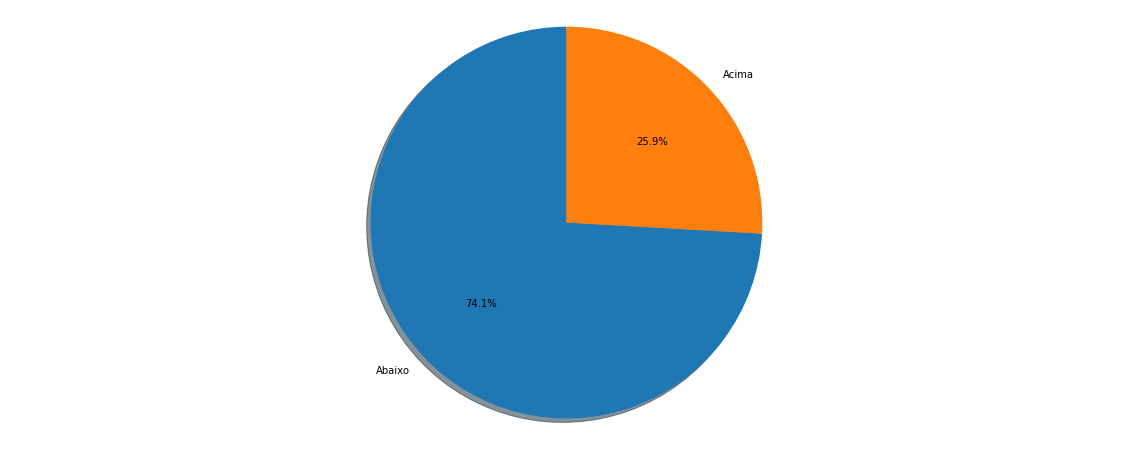

In [16]:
labels = ["Abaixo", "Acima"]
teste = df["Nr Litros"] >= df["Nr Litros"].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

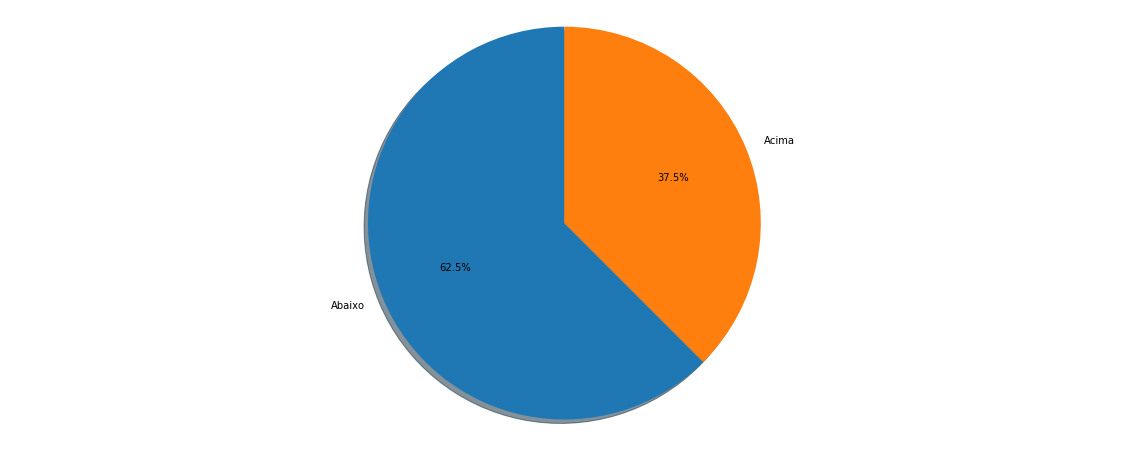

In [17]:
labels = ["Abaixo", "Acima"]
teste = df["Placa"].value_counts() >= df["Placa"].value_counts().mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

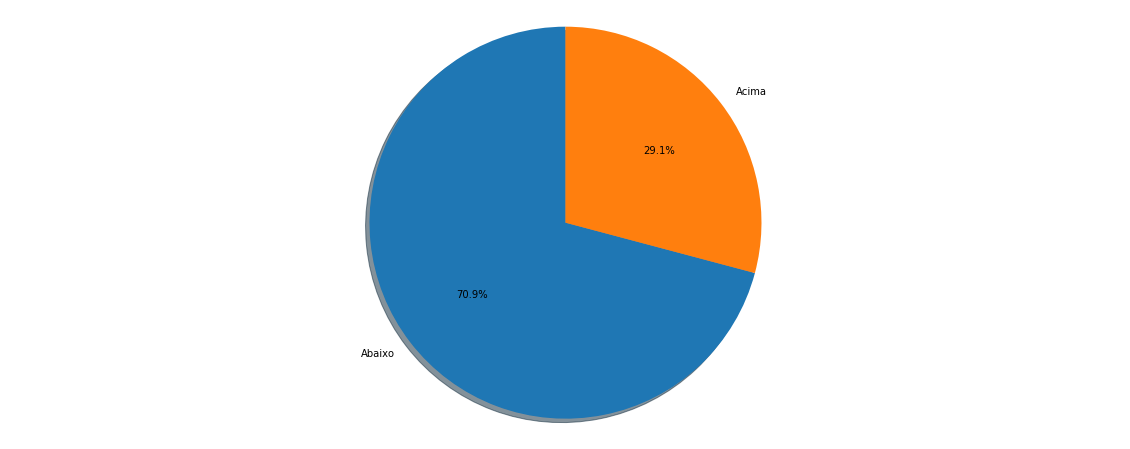

In [18]:
labels = ["Abaixo", "Acima"]
teste = df["Valor Abast."] >= df["Valor Abast."].mean()
sizes = teste.value_counts()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%' ,shadow = True, startangle=90)
ax1.axis('equal')
plt.show()

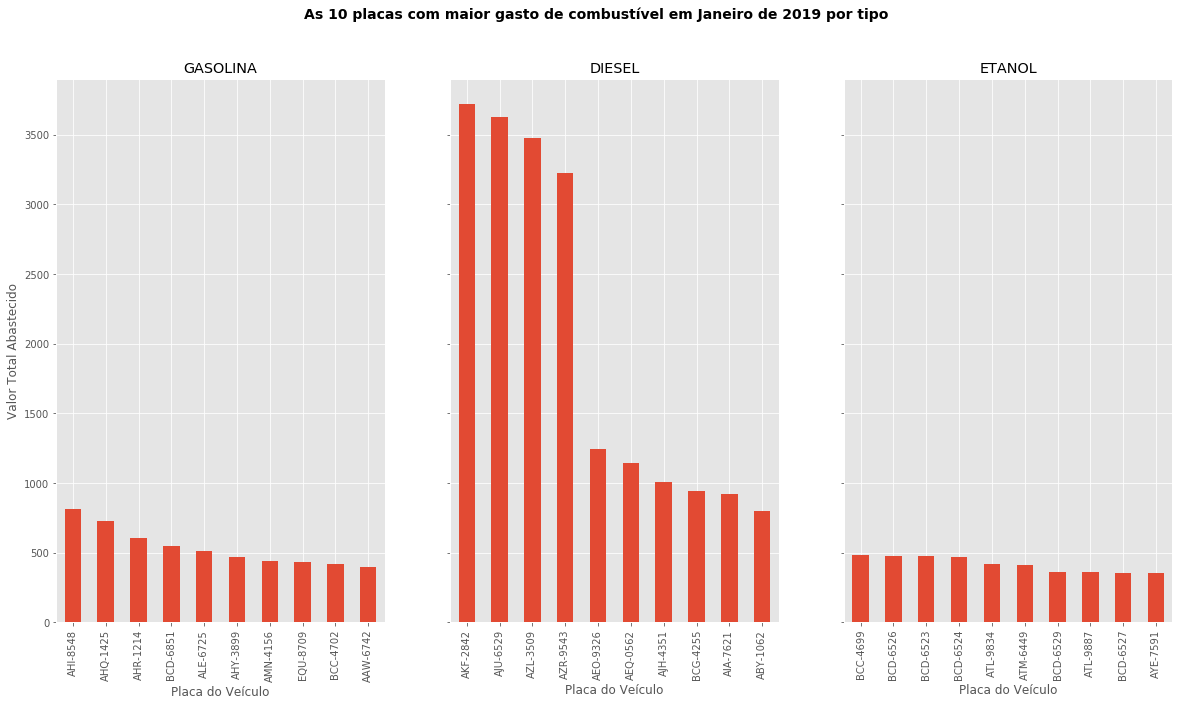

In [19]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]
#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot the data and get the average
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))
#plot GASOLINA
top_10_g.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='GASOLINA', xlabel='Placa do Veículo', ylabel='Valor Total Abastecido')
#plot DIESEL
top_10_d.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax1)
ax1.set(title='DIESEL', xlabel='Placa do Veículo', ylabel='')
#plot ETANOL
top_10_e.plot(kind='bar', y="Valor Abastecido", x="Placa", ax=ax2)
ax2.set(title='ETANOL', xlabel='Placa do Veículo', ylabel='')

#set limits and labels
#ax.set(title='As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', xlabel='Placa do Veículo', ylabel='Valor Abastecido Total')
fig.suptitle('As 10 placas com maior gasto de combustível em Janeiro de 2019 por tipo', fontsize=14, fontweight='bold')
    
#hide the legend
ax2.legend().set_visible(False)
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

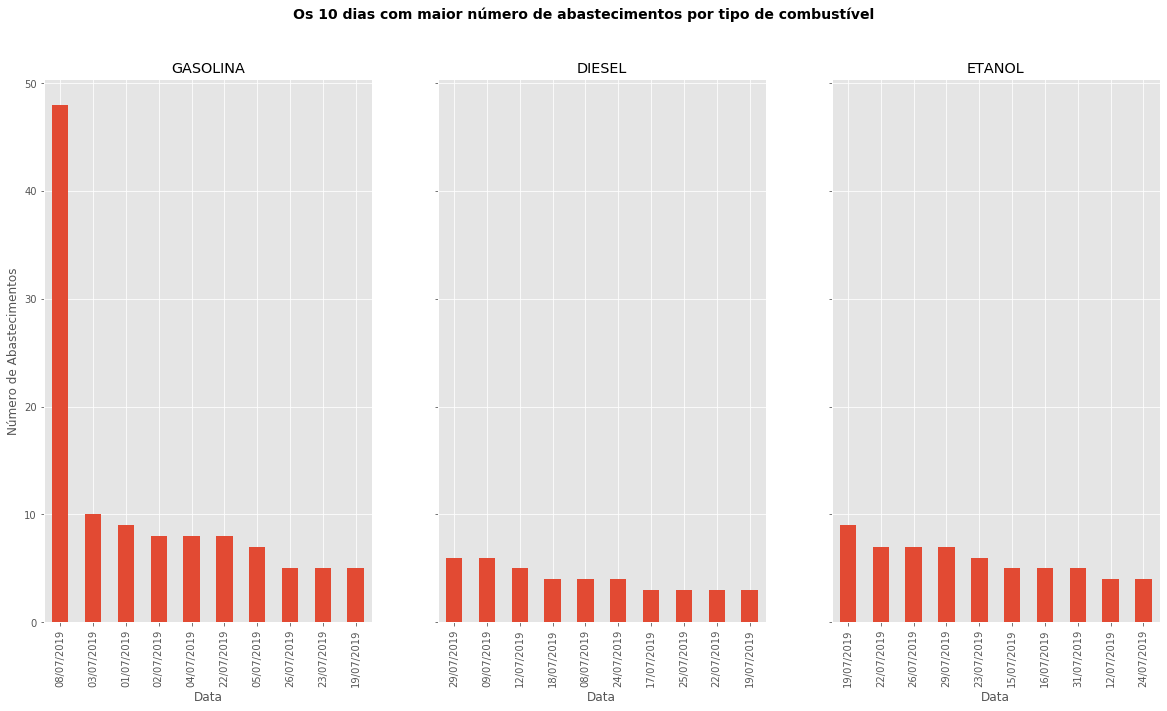

In [20]:
top_10_g = df[df["Produto"] == "GASOLINA"]
top_10_d = df[df["Produto"] == "DIESEL"]
top_10_e = df[df["Produto"] == "ETANOL"]

#set ggplot style
plt.style.use('ggplot')

#plot data GASOLINA
top_10_g = (top_10_g.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_g.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data DIESEL
top_10_d = (top_10_d.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_d.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#plot data ETANOL
top_10_e = (top_10_e.groupby('Data')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'count', 'Nr Litros': 'count'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10_e.rename(columns={'Data': 'Data', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,ncols=3, sharey=True, figsize=(20, 10))

#plot GASOLINA
top_10_g.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax0)
ax0.set(title="GASOLINA", xlabel='Data', ylabel='Número de Abastecimentos')

#plot DIESEL
top_10_d.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax1)
ax1.set(title="DIESEL", xlabel='Data', ylabel='')

#plot ETANOL
top_10_e.plot(kind='bar', y = "Valor Abastecido", x ="Data", ax=ax2)
ax2.set(title="ETANOL", xlabel='Data', ylabel='')

#set limits and labels
fig.suptitle('Os 10 dias com maior número de abastecimentos por tipo de combustível', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)
ax2.legend().set_visible(False)

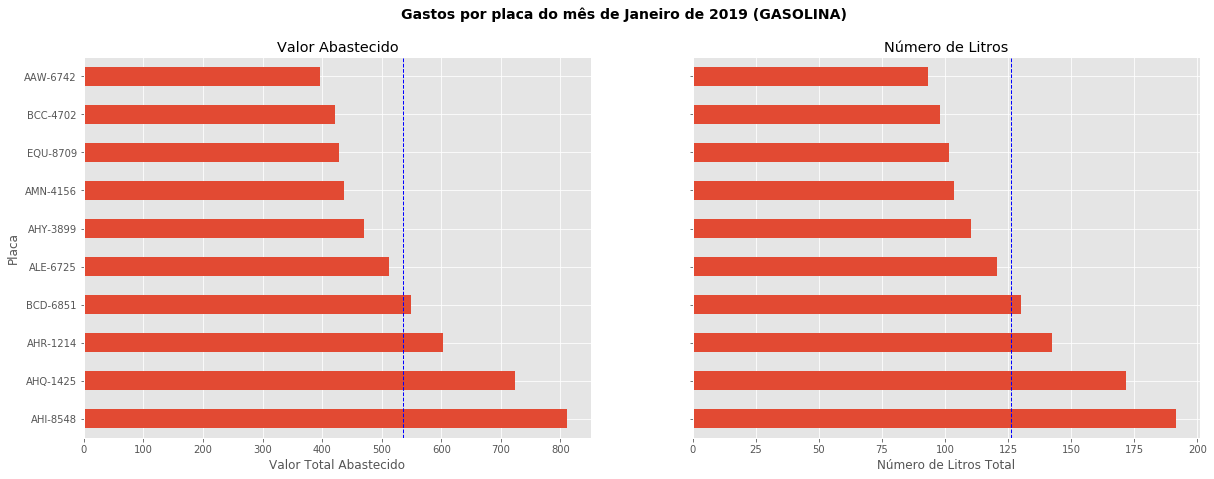

In [21]:
#get the figure and the axes
top_10 = df[df["Produto"] == "GASOLINA"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (GASOLINA)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

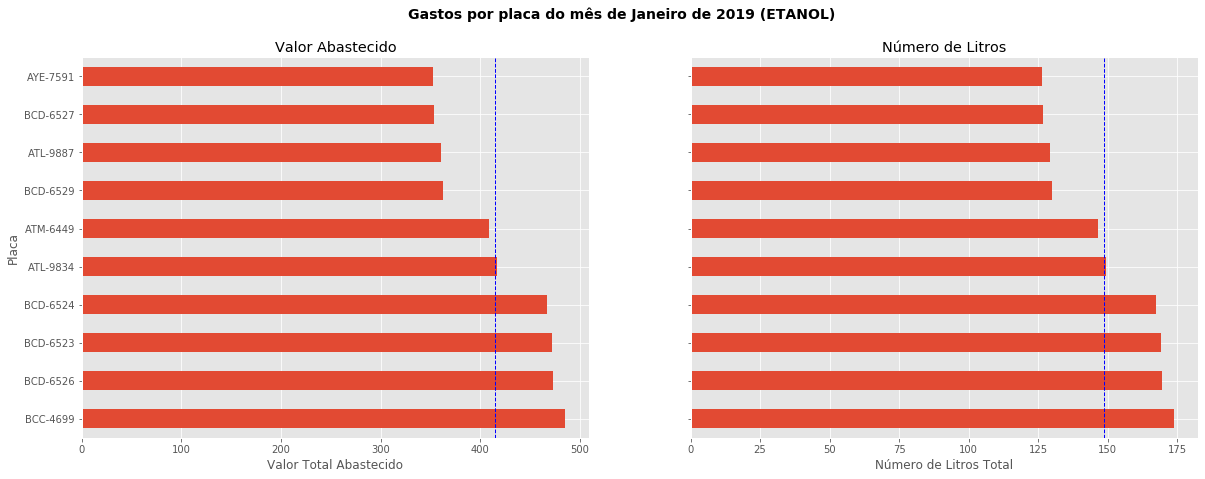

In [22]:
#get the figure and the axes
top_10 = df[df["Produto"] == "ETANOL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (ETANOL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

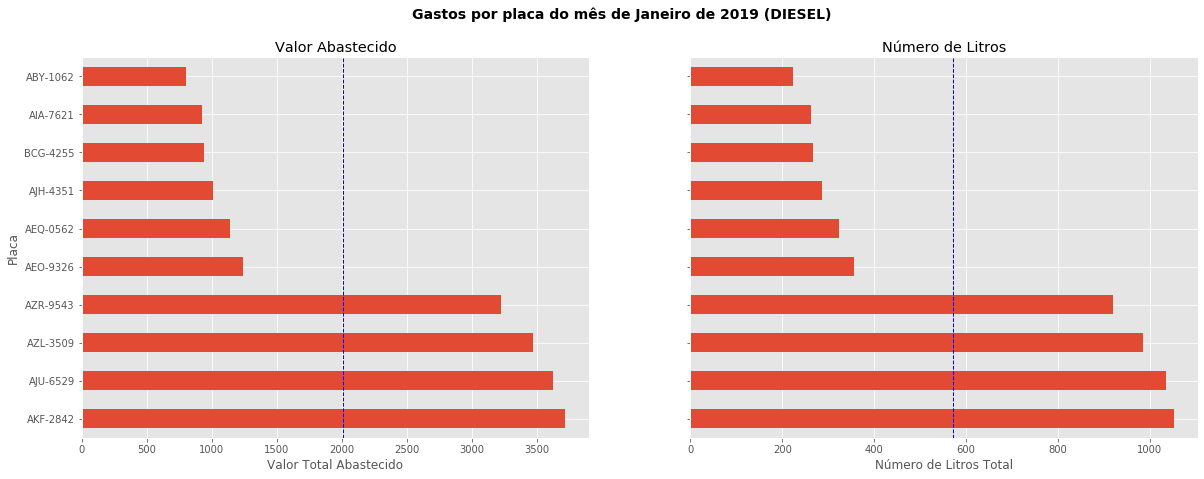

In [23]:
#get the figure and the axes
top_10 = df[df["Produto"] == "DIESEL"]

#plot data GASOLINA
top_10 = (top_10.groupby('Placa')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Placa': 'Placa', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=True, figsize=(20, 7))
top_10.plot(kind='barh', y="Valor Abastecido", x="Placa", ax=ax0)
ax0.set(title='Valor Abastecido', xlabel='Valor Total Abastecido', ylabel='Placa')

#plot the average as a vertical line
avg = top_10['Valor Abastecido'].mean()
ax0.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#repeat for the Nr Litros plot
top_10.plot(kind='barh', y="Número de Litros", x="Placa", ax=ax1)
avg = top_10['Número de Litros'].mean()
ax1.set(title='Número de Litros', xlabel='Número de Litros Total', ylabel='')
ax1.axvline(x=avg, color='b', label='Média', linestyle='--', linewidth=1)

#title the figure
fig.suptitle('Gastos por placa do mês de Janeiro de 2019 (DIESEL)', fontsize=14, fontweight='bold')

#hide the legend
ax1.legend().set_visible(False)
ax0.legend().set_visible(False)

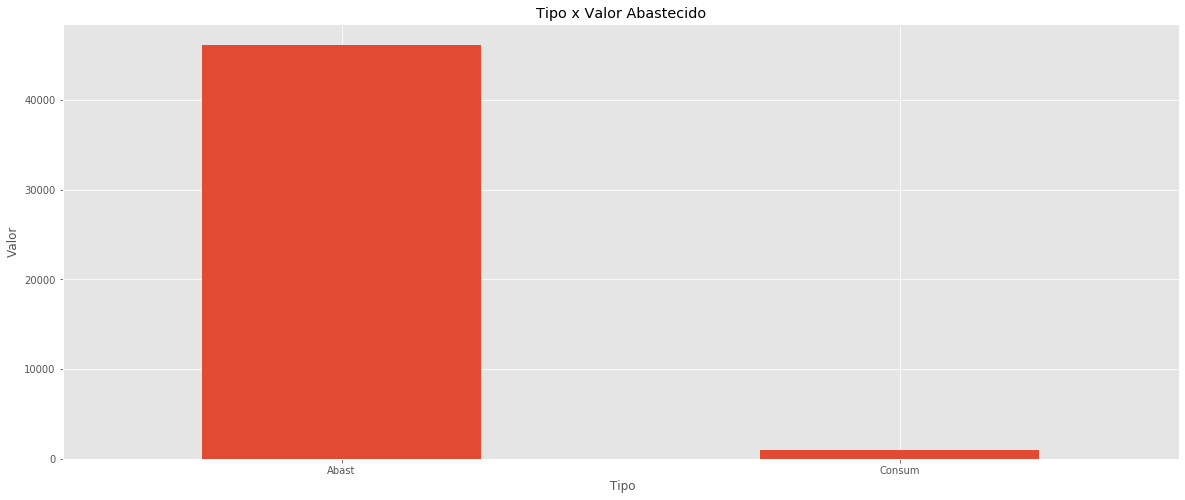

In [24]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Tipo')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Tipo': 'Tipo', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, ax = plt.subplots()

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Tipo", rot = 0, ax=ax)
avg = top_10['Valor Abastecido'].mean()

#set limits and labels
ax.set(title='Tipo x Valor Abastecido', xlabel=' Tipo', ylabel='Valor')

#hide the legend
ax.legend().set_visible(False)

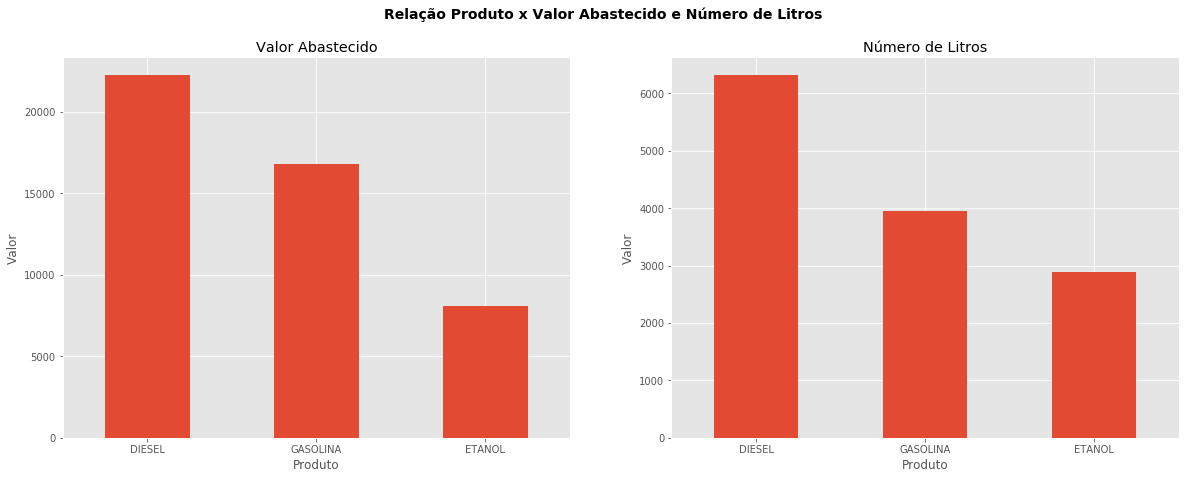

In [25]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'sum', 'Nr Litros': 'sum'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

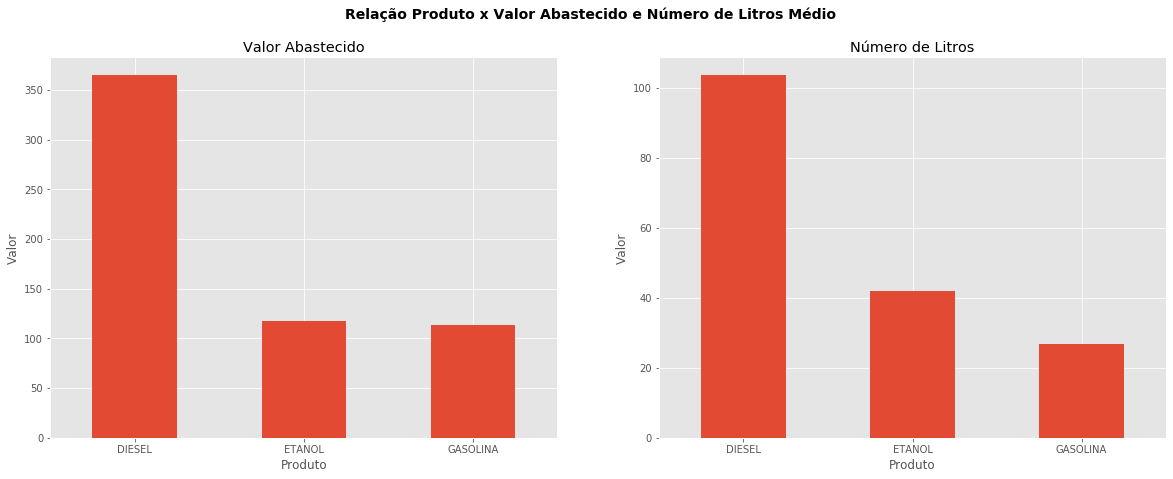

In [26]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'mean', 'Nr Litros': 'mean'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Valor Abastecido e Número de Litros Médio', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)

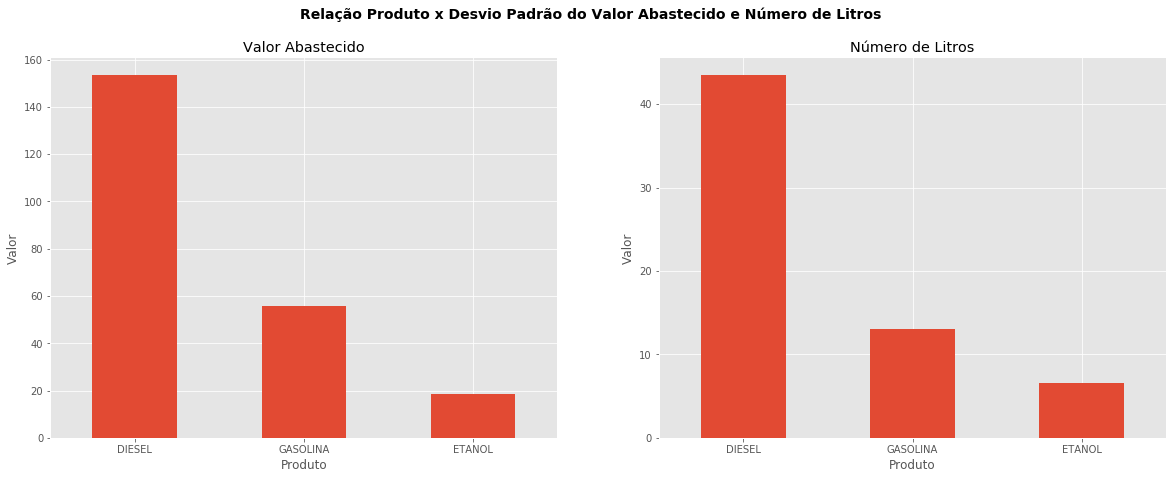

In [27]:
#set ggplot style
plt.style.use('ggplot')

#plot data
top_10 = (df.groupby('Produto')['Valor Abast.', 'Nr Litros'].agg({'Valor Abast.': 'std', 'Nr Litros': 'std'})
          .sort_values(by='Valor Abast.', ascending=False))[:10].reset_index()
top_10.rename(columns={'Produto': 'Produto', 'Valor Abast.': 'Valor Abastecido', 'Nr Litros': 'Número de Litros'}, inplace=True)

#create the figure and the axes
fig, (ax0, ax1) = plt.subplots(nrows=1,ncols=2, sharey=False, figsize=(20, 7))

#plot the data and get the average
top_10.plot(kind='bar', y = "Valor Abastecido", x ="Produto", rot = 0, ax=ax0)
#set limits and labels
ax0.set(title='Valor Abastecido', xlabel='Produto', ylabel='Valor')

#plot the data and get the average
top_10.plot(kind='bar', y = "Número de Litros", x ="Produto", rot = 0, ax=ax1)
#set limits and labels
ax1.set(title='Número de Litros', xlabel='Produto', ylabel='Valor')

#title the figure
fig.suptitle('Relação Produto x Desvio Padrão do Valor Abastecido e Número de Litros', fontsize=14, fontweight='bold')

#hide the legend
ax0.legend().set_visible(False)
ax1.legend().set_visible(False)